# Tworzenie wizualizacji danych za pomocą pakietów `matplotlib` i `seaborn`

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
pd.set_option('max_columns', 50)

# Podstawowe typy wykresów

## Histogramy

Załóżmy, że dysponujemy danymi, dotyczącymi czasów reakcji. Generalnie spodziewamy się, że czasy reakcji są prawoskośne. Podstawowym wytłumaczeniem tego faktu jest to, że istnieje fizjologiczny dolny limit dla czasu reakcji (około 100-150ms), nie istnieje zaś górny limit. Chcielibyśmy zobaczyć, czy faktycznie tak jest używając histogramu. Wczytajmy więc nasze dane dotyczące czasów reakcji z dwujęzycznego eksperymentu dotyczącego efektu Stroopa z pliku `bi-stroop.csv`

In [2]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/bi-stroop.csv')
data.head()

,Unnamed: 0,participant,condition,rt,lang
0,0,1,congruent,445.882646,pol
1,1,1,congruent,265.583884,pol
2,2,1,incongruent,392.007832,pol
3,3,1,congruent,349.962448,pol
4,4,1,incongruent,188.844854,pol


Najprostszym sposobem na wykonanie histogramu jest posłużenie się funkcją `hist` z modułu `matplotlib.pyplot`. Jako argument przekazujemy po prostu kolumnę z naszymi danymi.

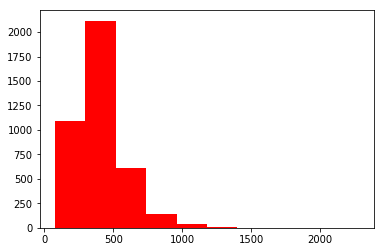

In [10]:
plt.hist(data['rt'],
        color = 'red'); # możemy dodatkowo zmienić wygląd naszego wykresu

Podobny histogram możemy również wykonać za pomocą pakietu `seaborn`. Dodatkowe opcje takie jak `axlabel` czy `rug` pozwalają dołączyć do wykresu dodatkowe elementy. Domyślnie `distplot` rysuje również krzywą dopasowaną metodą jądrowego estymatora gęstości, ale można to wyłączyć przekazując opcję `kde=False`.

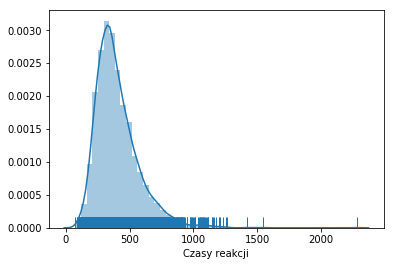

In [21]:
sns.distplot(data['rt'],
            axlabel='Czasy reakcji',
            rug = True);

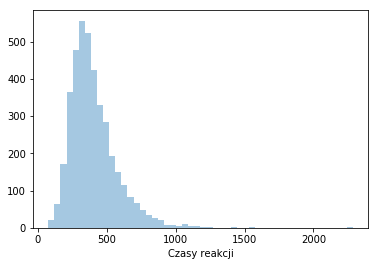

In [22]:
sns.distplot(data['rt'],
            axlabel='Czasy reakcji',
            kde = False);

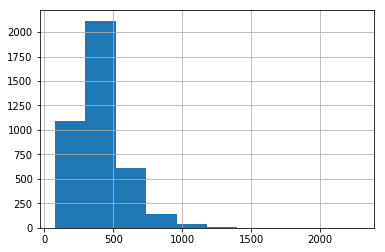

In [73]:
data['rt'].hist();

## Wykresy punktowe (*scatterplot*)

In [23]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/risk.csv')
data.head()

,Unnamed: 0,age,rating,participant
0,0,30.0,6.0,1
1,1,11.0,4.0,2
2,2,21.0,3.0,3
3,3,41.0,8.0,4
4,4,15.0,3.0,5


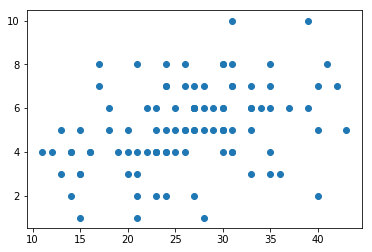

In [27]:
plt.scatter(data['age'], data['rating']);

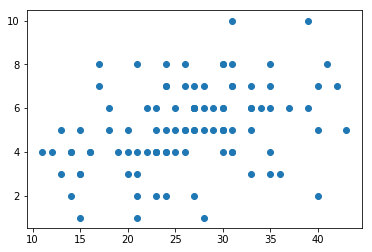

In [28]:
plt.scatter(y = 'rating', x = 'age', data = data);

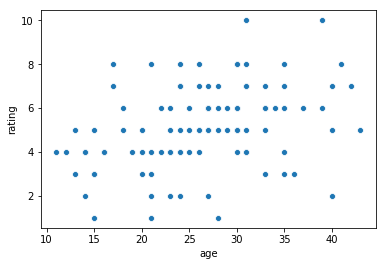

In [39]:
sns.scatterplot(y = 'rating', 
                x = 'age',
                data = data);

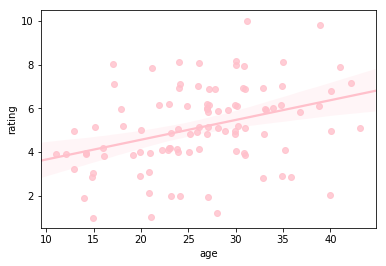

In [51]:
sns.regplot(y = 'rating', 
            x = 'age',
           x_jitter = 0.2, # możemy dodać dodatkowe "losowe" wartości, żeby uczynić wykres czytelniejszym
           y_jitter = 0.2,
            data = data,
           color = 'pink');

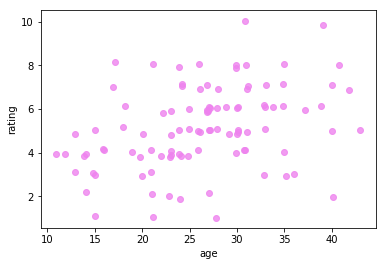

In [53]:
sns.regplot(y = 'rating', 
            x = 'age',
           x_jitter = 0.2, # możemy dodać dodatkowe "losowe" wartości, żeby uczynić wykres czytelniejszym
           y_jitter = 0.2,
            data = data,
            fit_reg=False, # nie musimy oglądać linii regreji
           color = 'violet');

## Wykresy pudełkowe

Bardzo często do przedstawienia rozkładu jakiejś zmiennej używa się wymyślonego przez Johna Tukeya wykresu pudełkowego (*boxplot*). Wykres taki przedstawia zazwyczaj:
+ medianę (pozioma kreska w środku "pudełka"
+ pierwszy i trzeci kwartyl rozkładu (dolna i górna krawędź pudełka)
+ ostatnią obserwację, która znajduje się w obszare I kwartyl - 1.5xIQR (rozstęp ćwiartkowy) do III kwartyl + 1.5xIQR
+ obserwacje odstające (punktami oznaczone sa obserwacje, które nie mieszczą się w ustalonym wyżej obszarze)

Spróbujmy przedstawić rozkład zmiennej dotyczącej czasu reakcji z dwujęzycznego Stroopa.

In [67]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/bi-stroop.csv')
data.head()

,Unnamed: 0,participant,condition,rt,lang
0,0,1,congruent,445.882646,pol
1,1,1,congruent,265.583884,pol
2,2,1,incongruent,392.007832,pol
3,3,1,congruent,349.962448,pol
4,4,1,incongruent,188.844854,pol


Podzielmy nasze czasy reakcji na dwie części, przyjmując kryterium rodzaju próby (kolor zgodny z treścią słowa vs kolor niezgodny z treścią słowa).

In [76]:
congruent = data.groupby('condition')['rt'].get_group('congruent')
incongruent = data.groupby('condition')['rt'].get_group('congruent')

Za pomocą funkcji `boxplot` z modułu `matplotlib.pyplot` możemy narysować wykres pudełkowy. Jeżeli chcemy więcej niż jedno pudełko, jako argument musimy przekazać listę.

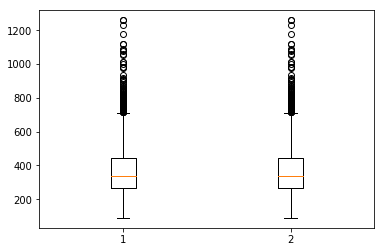

In [78]:
plt.boxplot([congruent, incongruent]);

Pakiet `seaborn` oferuje nieco przyjaźniejszy interfejs do rysowania wykresów pudełkowych pod postacia funkcji `boxplot`. W funkcji tej możmy podać odpowiednie nazwy kolumn:
+ co jest zmienną, której rozkład chcemy zilustrować (argument `y`)
+ czynnik grupujący na osi X (argument `x`)
+ czynnik grupujący według koloru wykresu (argument `hue`)
+ ramkę danych z danymi (argument `data`)

Plusem funkcji `boxplot` jest to, że od razu narysuje ona ładną legendę, pokoloruje wykresy według wskazanych przez nas czynników grupujących i podpisze osie.

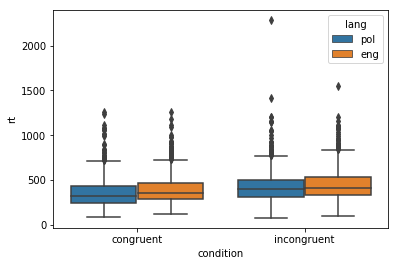

In [110]:
sns.boxplot(x = 'condition',
             y = 'rt',
             hue = 'lang',
             data = data)

`seaborn` oferuje dwie interesujące wariacje na temat wykresu pudełkowego. Jedną z nich jest `swarmplot`:

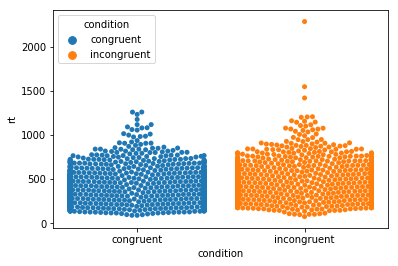

In [83]:
sns.swarmplot(x = 'condition',
             y = 'rt',
             hue = 'condition',
             data = data)

Drugim takim wykresem jest wykres skrzypcowy (*violin plot*). Jest on bardzo podobny do wykresu pudełkowego z tą jednak różnicą, że pozwala dokładniej przyjrzeć się rozkładowi (tutaj np. lepiej widzimy ogon rozkładu czasów reakcji).

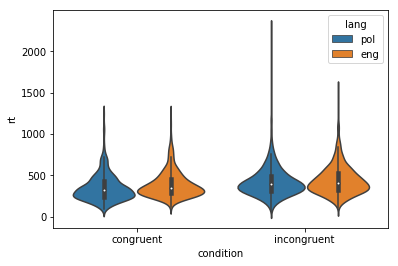

In [109]:
sns.violinplot(x = 'condition',
             y = 'rt',
             hue = 'lang',
             data = data)

## Wykresy kolumnowe

Wykresy kolumnowe mogą wydawać się bardzo trywialnym narzędziem, niemniej jest jednym z bardziej efektywnych sposobów przekazywania informacji (szczególnie osobom niewyspecjalizowanym z bardziej wyrafinowanymi wykresami). Jeśli chodzi o wykresy kolumnowe, to z grubsza możemy podzielić je na dwa rodzaje. W każdym wykresie kolumnowym musimy jakoś zagregować informacje - jeżeli mamy zmienną kategorialna to agregujemy je w zliczenia, jeżeli mamy zmienną liczbową, to możemy posłużyć się którąś z miar tendencji centralne (średnia, mediana) albo innym parametrem rozkładu. My zajmiemy się zliczeniami i średnimi.

### Dla zliczeń

W przypadku prostych zliczeń sprawa nie jest skomplikowana - możemy użyć funkcji `countplot` z pakietu `seaborn`. Zliczanie wykona ona za nas. Wczytajmy więc dane dotyczace "oślich zdań" i stwórzmy wykres obrazujący rozkład odpowiedzi typu A, B oraz C.

In [3]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/osly.csv')
data.head()

,participant,donkey_interp
0,1,A
1,2,A
2,3,B
3,4,A
4,5,B


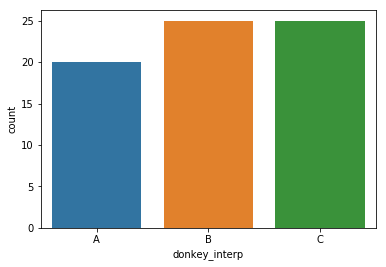

In [92]:
sns.countplot(x='donkey_interp', data = data)

### Dla średnich

W przypadku średnich sprawa również nie jest skomplikowana - musimy użyć funkcji `barplot`. W przypadku średnich możemy również podać w argumencie `ci` przedział ufności, który oznaczony będzie "wąsami" na wykresie. My zdecydowaliśmy się na 99% przedział ufności wokół średnie. Poniżej znajdują się dane dotyczace czasów reakcji z dwujęzycznego Stroopa.

In [106]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/bi-stroop.csv')
data.head()

,Unnamed: 0,participant,condition,rt,lang
0,0,1,congruent,445.882646,pol
1,1,1,congruent,265.583884,pol
2,2,1,incongruent,392.007832,pol
3,3,1,congruent,349.962448,pol
4,4,1,incongruent,188.844854,pol


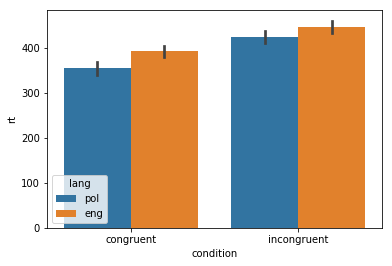

In [108]:
sns.barplot(x = 'condition',
            hue = 'lang',
            y = 'rt',
            ci = 99, # domyślnie jest to odchylenie standardowe
            data = data)